# Fundamentals of Social Data Science 2025. Week 1. Day 2. Exercises

This is our group assignment.

You will be expected to submit an individual assignment on Tuesday at 12pm (not Monday) on Canvas. The sheet that you will be expected to submit will be released on Friday at 12pm. It is submitted on Tuesday because you will want to integrate your materials post-presentation. 

- That sheet will have a small number of individual questions related to Friday's assignment
- It will include one question about your presentation. That question is reproduced below so there are no surprises. 

The assignment submission details will be posted on Canvas under assignments.

To itemise: 
- Week 1. Day 2. Wednesday at 12pm: This "getting started" sheet is released. 
- Wednesday afternoon tutorial: We will want to ensure that you can get started on loading data. 
- Week 1. Day 3. Friday at 12pm: The individual assignment is released. 
- Week 1. Day 3. Friday afternoon tutorial: You will want to play with the Claude artifact as well as continue working with your group. 
- Week 2. Day 1. Monday at 12pm: An exercise will be released related to Network Canvas. It will require you to download Network Canvas interviewer from networkcanvas.com. 
- Week 2. Day 1. Monday afternoon tutorial: Bernie will explain the Network Canvas exercise as a part of the class. The tutorial period will be group presentations. 
- Tuesday at 12pm: Your individual assignment is due. 
- Tuesday at 12pm: Your group assignment should be posted. 

> **NOTE:** This assignment will use data from the web. This assignment has NOT been cleared for research via the CUREC process. It is an in-class assignment. Therefore, if you wish to publish anything from this analysis, you must first apply for a CUREC before publishing anything publicly with your Oxford affiliation. 

# Group exercise: Getting started

The group assignment will make use of the StackDownloader from the FSSTDS repository. This downloader (recently tested) will download, extract and process a StackExchange archive. It is pretty close to 'one click'. It creates a 'feather' archive, which is a very nice format for compressing DataFrames. You can open this in your own code. 

To begin, you will need to have everything installed for the StackDownloader. How do we do that? We install the requirements.

- **Step 1.** Clone the FSSTDS repository. 
- **Step 2.** Open the Ch.00.Stack_downloader and 'select kernel', select "Python Environments...", "Create Python Environment", "Venv -> Creates a `.venv` virtual environment in the current workspace", select **Python 3.12**. Note 3.14 is untested. Select dependencies to install -> requirements.txt. 
- **Step 3.** Run the big code cell in Stack_downloader. Select a specific archive. 
- **Step 4.** Locate and load the DataFrame. You can now use the Stack Exchange in your work. 

Note if you get errors with PyArrow below, try restarting the kernel. 

In [1]:
# In case this Jupyter Notebook is in a different repo than FSSTDS, you may need to install
# pandas and pyarrow to parse the file. 
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pandas", "pyarrow"])


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


0

In [2]:
# Q0. Check that you can load your own DataFrame
 
import pandas as pd 

stack_df = df = pd.read_feather('../data/gardening.stackexchange.com/Posts.feather')

print(stack_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44155 entries, 0 to 44154
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     44155 non-null  object        
 1   PostTypeId             44155 non-null  object        
 2   AcceptedAnswerId       7733 non-null   object        
 3   CreationDate           44155 non-null  datetime64[ns]
 4   Score                  44155 non-null  int64         
 5   ViewCount              17860 non-null  float64       
 6   Body                   44155 non-null  object        
 7   OwnerUserId            43628 non-null  object        
 8   LastEditorUserId       18450 non-null  object        
 9   LastEditDate           18543 non-null  datetime64[ns]
 10  LastActivityDate       44155 non-null  datetime64[ns]
 11  Title                  17860 non-null  object        
 12  Tags                   17860 non-null  object        
 13  A

# Q1. Navigating the data. 

Let's begin with some exploratory data analysis. Despite being a group assignment, you should individually be able to accomplish the following. 

1. The data contains different post types. How many questions and how many answers? Try: `display(stack_df['PostTypeId'].value_counts())` 
2. How many users are in this data set? 
3. What is the average score of the user?
4. What is the average number of comments for the users?
5. Plot the distribution of the number of comments by user. Is it normally distributed?  

In [3]:
# Answers to Q1.1...Q1.5 
# (Unsubmitted; merely for practice and preparation; 
# every student should be able to do this themselves. 



## Q2. Defining helpfulness 

If you can describe the data simply then you are on your way to the big question for the group. Recall two of the trade-offs from the last lecture: "operationalisation" and "coding". The group project this week is very simple in some senses and very complex in other senses: 

Two questions: 
> - "How can we identify the most helpful users in this space" 
> - "When were the helpful users the most helpful or most active?"

So this means that your group will have to discuss:
- What defines helpfulness? Are there multiple possible metrics? 
- Do we think that a helpful person should _always_ be helpful? 
- Is helpfulness topic-specific? 
- You may want to explore wrangling the data by time. 

We do not expect you to merge in data from the users.xml / users.feather for this. However, you may want to explore how to create a datatime column. This is not covered in this lecture, but you may want to read either Chapter 10 of FSSTDS on cleaning data and Chapter 12 of FSSTDS on wrangling time data. 

You will want to divide some tasks among your group. Some might be delegated to surf the space online to come up with abductive hypotheses. Some might want to focus on rendering some charts. Some might be excellent at presentation design or at presenting to the group. Lean into your expertise and collaborate.

Presentations for this will be on Monday afternoon. The presentations will be no more than 12 minutes + 3 minutes of questions & transition. 

Each group will have a 'space' on Canvas to submit 3 things: 
- the presentation 
- the code
- the 'credits'. A single sheet (in docx/md) that details which group members participated in which ways. Treat this not merely as accountability but an opportunity to signal your own strengths. We do not expect everyone to do 1/5 of the work for every task. We do expect everyone to contribute in some way.

This code will not be graded but it will be made available to other students. 
The presentations will be given short written feedback by the instructor post-presentation.

# Import data

In [4]:
import pandas as pd

In [5]:
post_df = pd.read_feather('../data/gardening.stackexchange.com/Posts.feather')
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44155 entries, 0 to 44154
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     44155 non-null  object        
 1   PostTypeId             44155 non-null  object        
 2   AcceptedAnswerId       7733 non-null   object        
 3   CreationDate           44155 non-null  datetime64[ns]
 4   Score                  44155 non-null  int64         
 5   ViewCount              17860 non-null  float64       
 6   Body                   44155 non-null  object        
 7   OwnerUserId            43628 non-null  object        
 8   LastEditorUserId       18450 non-null  object        
 9   LastEditDate           18543 non-null  datetime64[ns]
 10  LastActivityDate       44155 non-null  datetime64[ns]
 11  Title                  17860 non-null  object        
 12  Tags                   17860 non-null  object        
 13  A

In [6]:
post_df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'ContentLicense', 'ParentId', 'FavoriteCount', 'CommunityOwnedDate',
       'OwnerDisplayName', 'ClosedDate', 'LastEditorDisplayName', 'BodyText',
       'BodyURLs', 'TagsList'],
      dtype='object')

In [7]:
user_df = pd.read_feather('../data/gardening.stackexchange.com/Users.feather')
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29094 entries, 0 to 29093
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              29094 non-null  object        
 1   Reputation      29094 non-null  int64         
 2   CreationDate    29094 non-null  datetime64[ns]
 3   DisplayName     29094 non-null  object        
 4   LastAccessDate  29094 non-null  datetime64[ns]
 5   WebsiteUrl      5615 non-null   object        
 6   Location        9358 non-null   object        
 7   AboutMe         8833 non-null   object        
 8   Views           29094 non-null  int64         
 9   UpVotes         29094 non-null  int64         
 10  DownVotes       29094 non-null  int64         
 11  AccountId       29094 non-null  object        
 12  AboutMeText     8833 non-null   object        
 13  AboutMeURLs     8833 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(8)
memory usage

# Clean data

In [8]:
post_df['CreationDate'] = pd.to_datetime(post_df['CreationDate'])
post_df['CreationDate'].head()

0   2011-06-08 18:35:50.450
1   2011-06-08 18:37:12.493
2   2011-06-08 18:37:45.593
3   2011-06-08 18:37:53.583
4   2011-06-08 18:38:53.847
Name: CreationDate, dtype: datetime64[ns]

In [9]:
post_df = post_df[post_df['PostTypeId'].isin(['1', '2'])].copy() # filter posts to questions (type 1) and answers (type 2)
post_df['PostType'] = post_df['PostTypeId'].map({'1': 'Q', '2': 'A'})
post_df.head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,ParentId,FavoriteCount,CommunityOwnedDate,OwnerDisplayName,ClosedDate,LastEditorDisplayName,BodyText,BodyURLs,TagsList,PostType
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,None,NaN,NaT,None,NaT,None,Which side of a house will get the most sunlig...,[],[houseplants|sunlight],Q
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,None,NaN,NaT,None,NaT,None,"When I try to grow ""upside-down"" tomatoes, the...",[],[tomatoes],Q
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,None,NaN,NaT,None,NaT,None,I've got what I think is a cedar tree in my ba...,[],[trees|tree-care],Q
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,None,NaN,NaT,None,NaT,None,"I've got a big, lovely rhubarb plant in my yar...",[],[rhubarb|vegetables|harvesting],Q
4,5,2,None,2011-06-08 18:38:53.847,10,NaN,<p>This question depends on context. </p>\n\n...,31,31,2011-06-08 19:09:41.273,...,1,NaN,NaT,None,NaT,None,This question depends on context. I could s...,[],[],A


# Join questions to answers 

In [10]:
right = post_df[['Id', 'CreationDate', 'Score', 'OwnerUserId']]

In [11]:
post_df = pd.merge(left = post_df, right = right, how = 'left', left_on = 'AcceptedAnswerId', right_on = 'Id')
post_df.head()

,Id_x,PostTypeId,AcceptedAnswerId,CreationDate_x,Score_x,ViewCount,Body,OwnerUserId_x,LastEditorUserId,LastEditDate,...,ClosedDate,LastEditorDisplayName,BodyText,BodyURLs,TagsList,PostType,Id_y,CreationDate_y,Score_y,OwnerUserId_y
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,NaT,None,Which side of a house will get the most sunlig...,[],[houseplants|sunlight],Q,9,2011-06-08 18:39:49.137,30.0,32
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,NaT,None,"When I try to grow ""upside-down"" tomatoes, the...",[],[tomatoes],Q,64,2011-06-08 19:27:25.093,19.0,60
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,NaT,None,I've got what I think is a cedar tree in my ba...,[],[trees|tree-care],Q,29,2011-06-08 18:58:57.390,19.0,47
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,NaT,None,"I've got a big, lovely rhubarb plant in my yar...",[],[rhubarb|vegetables|harvesting],Q,11,2011-06-08 18:40:29.263,23.0,23
4,5,2,None,2011-06-08 18:38:53.847,10,NaN,<p>This question depends on context. </p>\n\n...,31,31,2011-06-08 19:09:41.273,...,NaT,None,This question depends on context. I could s...,[],[],A,NaN,NaT,NaN,NaN


In [12]:
question_df = post_df[post_df['PostType'] == 'Q']

# Exploratory analysis around questions/answers 

In [13]:
post_df.PostType.value_counts()

PostType
A    25421
Q    17860
Name: count, dtype: int64

In [14]:
question_df.AcceptedAnswerId.isna().value_counts()

AcceptedAnswerId
True     10127
False     7733
Name: count, dtype: int64

In [15]:
question_df.AcceptedAnswerId.isna().value_counts(normalize=True)

AcceptedAnswerId
True     0.567021
False    0.432979
Name: proportion, dtype: float64

In [16]:
question_df['is_answered'] = question_df['AnswerCount'] > 0
question_df['is_answered'].value_counts(normalize = True)

/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1395496024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['is_answered'] = question_df['AnswerCount'] > 0


is_answered
True     0.856047
False    0.143953
Name: proportion, dtype: float64

# Create "helpful" indicator variables 

In [17]:
question_df['accepted_answer_delay'] = question_df['CreationDate_y'] - question_df['CreationDate_x']
question_df['is_timely'] = question_df['accepted_answer_delay'].dt.days <= 2
question_df['is_accepted_answer'] = ~question_df['AcceptedAnswerId'].isna()
question_df['is_helpful'] = question_df['is_accepted_answer'] & question_df['is_timely']
question_df.head()

/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1388405112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['accepted_answer_delay'] = question_df['CreationDate_y'] - question_df['CreationDate_x']
/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1388405112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['is_timely'] = question_df['accepted_answer_delay'].dt.days <= 2
/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1388405112.py

,Id_x,PostTypeId,AcceptedAnswerId,CreationDate_x,Score_x,ViewCount,Body,OwnerUserId_x,LastEditorUserId,LastEditDate,...,PostType,Id_y,CreationDate_y,Score_y,OwnerUserId_y,is_answered,accepted_answer_delay,is_timely,is_accepted_answer,is_helpful
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,Q,9,2011-06-08 18:39:49.137,30.0,32,True,0 days 00:03:58.687000,True,True,True
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,Q,64,2011-06-08 19:27:25.093,19.0,60,True,0 days 00:50:12.600000,True,True,True
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,Q,29,2011-06-08 18:58:57.390,19.0,47,True,0 days 00:21:11.797000,True,True,True
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,Q,11,2011-06-08 18:40:29.263,23.0,23,True,0 days 00:02:35.680000,True,True,True
5,6,1,None,2011-06-08 18:39:09.920,29,4531.0,<p>My town recently took down a large 80 year ...,23,23,2011-06-08 18:58:27.547,...,Q,NaN,NaT,NaN,NaN,True,NaT,False,False,False


In [18]:
question_df.is_helpful.value_counts(normalize=True)

is_helpful
False    0.620829
True     0.379171
Name: proportion, dtype: float64

# Examine helpfulness over time 

In [19]:
question_df['month'] = pd.to_datetime((question_df['CreationDate_y'] - pd.offsets.MonthBegin(1)).dt.floor('D'))


/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/2705431938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['month'] = pd.to_datetime((question_df['CreationDate_y'] - pd.offsets.MonthBegin(1)).dt.floor('D'))


<Axes: xlabel='month'>

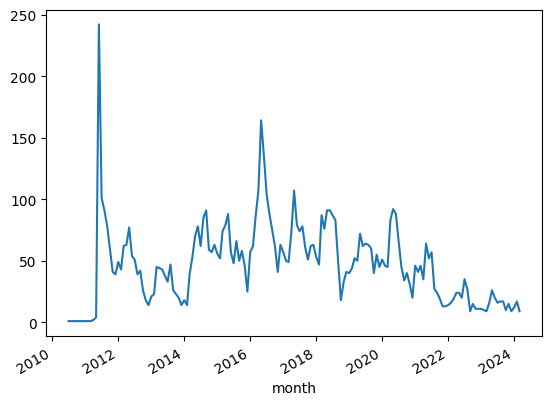

In [20]:
question_df.groupby('month').size().plot()

In [21]:
grouped = question_df.groupby([pd.Grouper(key='month'), 'OwnerUserId_y']).\
    size().\
    rename('num_helpful_answers').\
    reset_index().\
    sort_values(['OwnerUserId_y', 'month'])

In [22]:
grouped

,month,OwnerUserId_y,num_helpful_answers
6,2011-06-01,10,9
81,2011-08-01,10,1
181,2012-03-01,1007,1
199,2012-04-01,1007,1
7,2011-06-01,102,3
...,...,...,...
197,2012-03-01,985,1
58,2011-06-01,99,4
98,2011-08-01,99,1
217,2012-04-01,99,1


In [23]:
helpful_answers = question_df[question_df['is_helpful']][['OwnerUserId_y', 'CreationDate_y', 'month']]
helpful_answers.head()

,OwnerUserId_y,CreationDate_y,month
0,32,2011-06-08 18:39:49.137,2011-06-01
1,60,2011-06-08 19:27:25.093,2011-06-01
2,47,2011-06-08 18:58:57.390,2011-06-01
3,23,2011-06-08 18:40:29.263,2011-06-01
6,5,2011-06-09 22:53:27.483,2011-06-01


In [24]:
mi, ma = helpful_answers.month.min(), helpful_answers.month.max()
print(mi, ma)
cross = pd.MultiIndex.from_product([pd.date_range(start=mi, end=ma, freq="M"), helpful_answers.OwnerUserId_y.unique()])

2010-07-01 00:00:00 2024-03-01 00:00:00


/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1552621656.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cross = pd.MultiIndex.from_product([pd.date_range(start=mi, end=ma, freq="M"), helpful_answers.OwnerUserId_y.unique()])


In [25]:
grouped = helpful_answers.groupby([pd.Grouper(key='month'), 'OwnerUserId_y']).\
    size().\
    rename('num_helpful_answers').\
    reset_index().\
    sort_values(['OwnerUserId_y', 'month'])

In [26]:
grouped.set_index(['month', 'OwnerUserId_y']).head()

,,num_helpful_answers
month,OwnerUserId_y,
2011-06-01,10,9
2011-08-01,10,1
2012-04-01,1007,1
2011-06-01,102,3
2012-03-01,102,1


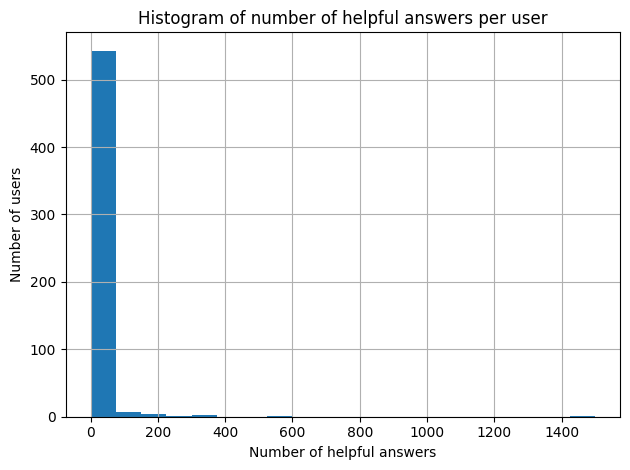

In [27]:
user_helpful_answer_count = helpful_answers.groupby('OwnerUserId_y').size().sort_values(ascending=False)
user_helpful_answer_count.hist(bins=20)
from matplotlib import pyplot as plt
plt.xlabel(f'Number of helpful answers')
plt.ylabel('Number of users')
plt.title('Histogram of number of helpful answers per user', wrap=True)
plt.tight_layout()

In [41]:
# ().dropna().dt.days.clip(upper=30).hist()


# Idenfity top helpful users

In [29]:
import numpy as np
np.percentile(user_helpful_answer_count, 95)

np.float64(33.200000000000045)

In [30]:
user_helpful_answer_count.head()

OwnerUserId_y
1380     1498
499       552
3351      361
419       332
20056     240
dtype: int64

In [31]:
top_users = user_helpful_answer_count[user_helpful_answer_count >= 33]

## When are helpful users active?

### Analysing all helpful answers (2 day threshold)

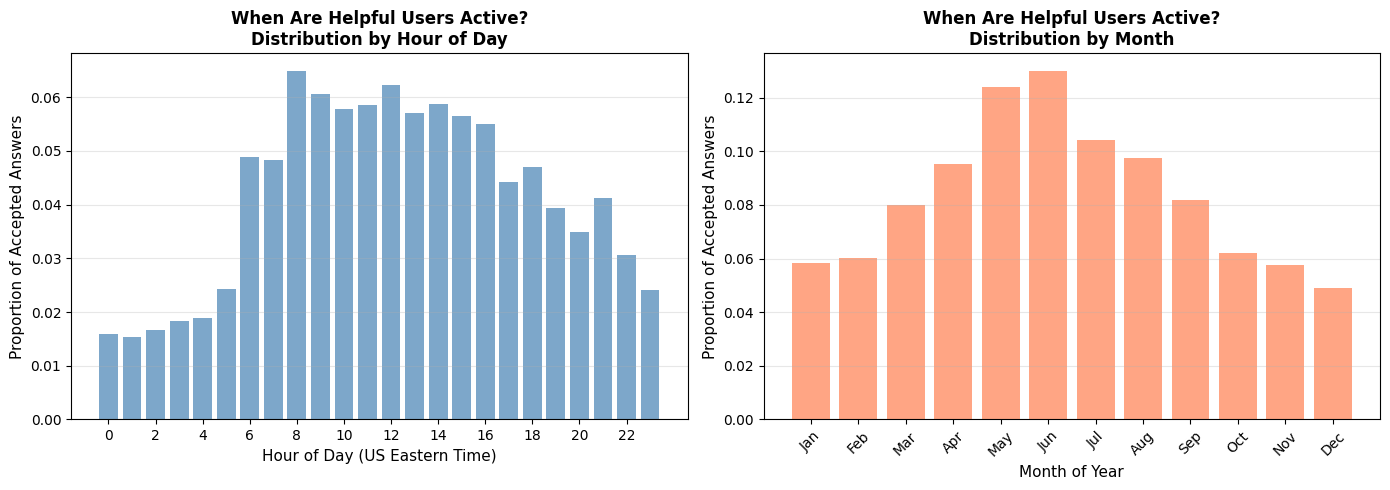


Peak activity hour: 8:00 ET (6.5% of answers)
Lowest activity hour: 1:00 ET (1.5% of answers)

Most active month: Jun (13.0% of answers)
Least active month: Dec (4.9% of answers)


In [32]:
# Convert timestamps to US Eastern timezone and extract hour of day
# Note timestamps are UTC (see: https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede?)
helpful_answers['CreationDate_ET'] = helpful_answers['CreationDate_y'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
helpful_answers['hour_of_day'] = helpful_answers['CreationDate_ET'].dt.hour
helpful_answers['month_of_year'] = helpful_answers['CreationDate_y'].dt.month

# Visualization 1: Hour of day when helpful answers are posted
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram by hour of day 
hour_counts = helpful_answers['hour_of_day'].value_counts(normalize=True).sort_index()
ax1.bar(hour_counts.index, hour_counts.values, color='steelblue', alpha=0.7)
ax1.set_xlabel('Hour of Day (US Eastern Time)', fontsize=11)
ax1.set_ylabel('Proportion of Accepted Answers', fontsize=11)
ax1.set_title('When Are Helpful Users Active?\nDistribution by Hour of Day', fontsize=12, fontweight='bold')
ax1.set_xticks(range(0, 24, 2))
ax1.grid(axis='y', alpha=0.3)

# Visualization 2: Month of year when helpful answers are posted
month_counts = helpful_answers['month_of_year'].value_counts(normalize=True).sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.bar(month_counts.index, month_counts.values, color='coral', alpha=0.7)
ax2.set_xlabel('Month of Year', fontsize=11)
ax2.set_ylabel('Proportion of Accepted Answers', fontsize=11)
ax2.set_title('When Are Helpful Users Active?\nDistribution by Month', fontsize=12, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names, rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nPeak activity hour: {hour_counts.idxmax()}:00 ET ({hour_counts.max():.1%} of answers)")
print(f"Lowest activity hour: {hour_counts.idxmin()}:00 ET ({hour_counts.min():.1%} of answers)")
print(f"\nMost active month: {month_names[month_counts.idxmax()-1]} ({month_counts.max():.1%} of answers)")
print(f"Least active month: {month_names[month_counts.idxmin()-1]} ({month_counts.min():.1%} of answers)")

### Analysing the top users (included users)


Total top users: 29
Total helpful answers from top users: 5358
Proportion of all helpful answers: 79.1%



/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1756711012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['CreationDate_ET'] = question_df['CreationDate_y'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1756711012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['hour_of_day'] = question_df['CreationDate_ET'].dt.hour
/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_20344/1756711012

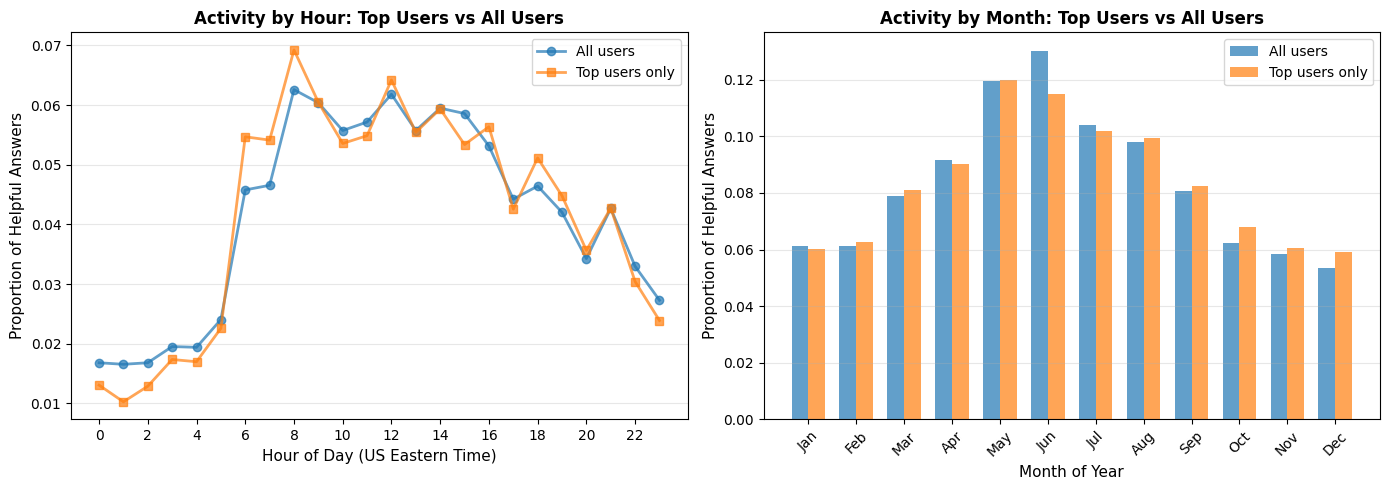

In [33]:
# Add timezone and extract day/month
question_df['CreationDate_ET'] = question_df['CreationDate_y'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
question_df['hour_of_day'] = question_df['CreationDate_ET'].dt.hour
question_df['month_of_year'] = question_df['CreationDate_y'].dt.month

# Calculating the same stuff but for top users according to Max's criteria
helpful_answers_top_users = question_df[question_df['OwnerUserId_y'].isin(top_users.index)].copy()

# # Add timezone and extract day/month
# helpful_answers_top_users['CreationDate_ET'] = helpful_answers_top_users['CreationDate_y'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
# helpful_answers_top_users['hour_of_day'] = helpful_answers_top_users['CreationDate_ET'].dt.hour
# helpful_answers_top_users['month_of_year'] = helpful_answers_top_users['CreationDate_y'].dt.month


print(f"Total top users: {len(top_users)}")
print(f"Total helpful answers from top users: {len(helpful_answers_top_users)}")
print(f"Proportion of all helpful answers: {len(helpful_answers_top_users)/len(helpful_answers):.1%}\n")

# Create visualizations comparing all users vs top users
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hour of day comparison
hour_counts_all = question_df['hour_of_day'].value_counts(normalize=True).sort_index()
hour_counts_top = helpful_answers_top_users['hour_of_day'].value_counts(normalize=True).sort_index()

ax1 = axes[0]
ax1.plot(hour_counts_all.index, hour_counts_all.values, 'o-', label='All users', alpha=0.7, linewidth=2)
ax1.plot(hour_counts_top.index, hour_counts_top.values, 's-', label='Top users only', alpha=0.7, linewidth=2)
ax1.set_xlabel('Hour of Day (US Eastern Time)', fontsize=11)
ax1.set_ylabel('Proportion of Helpful Answers', fontsize=11)
ax1.set_title('Activity by Hour: Top Users vs All Users', fontsize=12, fontweight='bold')
ax1.set_xticks(range(0, 24, 2))
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Month comparison
month_counts_all = question_df['month_of_year'].value_counts(normalize=True).sort_index()
month_counts_top = helpful_answers_top_users['month_of_year'].value_counts(normalize=True).sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax2 = axes[1]
x = range(1, 13)
width = 0.35
ax2.bar([i - width/2 for i in x], [month_counts_all.get(i, 0) for i in x], width, label='All users', alpha=0.7)
ax2.bar([i + width/2 for i in x], [month_counts_top.get(i, 0) for i in x], width, label='Top users only', alpha=0.7)
ax2.set_xlabel('Month of Year', fontsize=11)
ax2.set_ylabel('Proportion of Helpful Answers', fontsize=11)
ax2.set_title('Activity by Month: Top Users vs All Users', fontsize=12, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names, rotation=45)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# How does our metric relate to other stack overflow metrics? 

In [34]:
user_df.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,AboutMeText,AboutMeURLs
0,-1,1,2011-06-08 17:07:46.740,Community,2011-06-08 17:07:46.740,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",214,0,0,-1,"Hi, I'm not really a person. I'm a background ...",[http://meta.stackexchange.com/a/92006]
1,2,101,2011-06-08 18:25:25.927,Geoff Dalgas,2018-05-10 17:17:40.317,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,4,3,0,2,Dev #2 who helped create Stack Overflow curren...,"[http://www.twitter.com/SuperDalgas, http://bl..."
2,3,101,2011-06-08 18:25:40.170,Nick Craver,2016-07-11 14:39:34.307,https://nickcraver.com/blog/,"Winston-Salem, NC",<p>I am a Principal Software Engineer at Micro...,3,0,0,7598,I am a Principal Software Engineer at Microsof...,"[https://nickcraver.com/blog/, https://twitter..."
3,4,101,2011-06-08 18:29:20.053,Emmett,2016-04-10 17:04:40.243,http://minesweeperonline.com,"San Francisco, CA","<p>co-founder of <a href=""https://airtable.com...",2,0,0,1998,co-founder of Airtable formerly a dev at Stack...,[https://airtable.com]
4,5,3509,2011-06-08 18:31:17.077,Shane,2016-03-06 22:10:26.660,http://shepherdweb.com/,Texas,"<p>I'm a software developer, tennis player, DY...",94,57,0,512694,"I'm a software developer, tennis player, DYI e...",[]


In [35]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29094 entries, 0 to 29093
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              29094 non-null  object        
 1   Reputation      29094 non-null  int64         
 2   CreationDate    29094 non-null  datetime64[ns]
 3   DisplayName     29094 non-null  object        
 4   LastAccessDate  29094 non-null  datetime64[ns]
 5   WebsiteUrl      5615 non-null   object        
 6   Location        9358 non-null   object        
 7   AboutMe         8833 non-null   object        
 8   Views           29094 non-null  int64         
 9   UpVotes         29094 non-null  int64         
 10  DownVotes       29094 non-null  int64         
 11  AccountId       29094 non-null  object        
 12  AboutMeText     8833 non-null   object        
 13  AboutMeURLs     8833 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(8)
memory usage

In [36]:
user_helpful_answer_count = user_helpful_answer_count.reset_index().rename(columns={0: 'num_helpful_answers'})

In [37]:
question_user = pd.merge(left=user_helpful_answer_count, right=user_df, how='left', left_on='OwnerUserId_y', right_on='Id')

Text(0.5, 1.0, 'User Reputation vs Number of Helpful Answers Given')

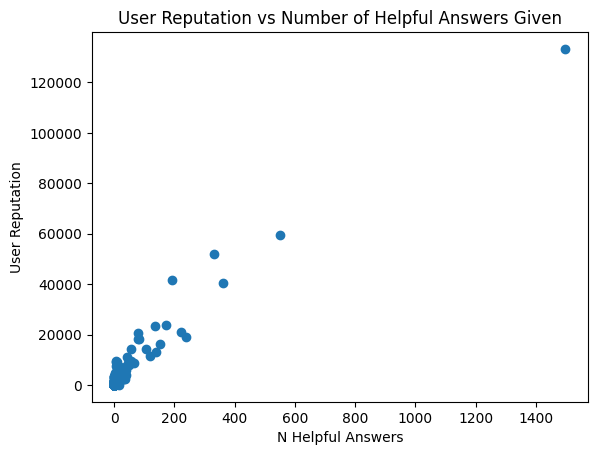

In [38]:
plt.scatter(question_user['num_helpful_answers'], question_user['Reputation'])
plt.xlabel('N Helpful Answers')
plt.ylabel('User Reputation')
plt.title('User Reputation vs Number of Helpful Answers Given', wrap=True)

In [39]:
np.corrcoef(question_user['num_helpful_answers'], question_user['Reputation'])

array([[1.        , 0.96126385],
       [0.96126385, 1.        ]])

# Q3. Your individual submission 

Your individual submission on Week 2 (from the sheet to be shared on Friday) will have two broad questions. One of these will be related to the Claude artifact that will be shared on Friday. The other will be related to this work. The question will be on the Friday assignment's sheet so you do not have to submit two sheets. It is posted here so you can see where we are going. 

## Defining helpfulness 

Describe two different ways of operationalising helpfulness. Report on these with descriptive statistics. One of these should be the form of helpfulness that is discussed in the group presentation. One should be a version that you have determined individually. It does need to not be complicated. Articulate the difference between these two interpretations of helpfulness and why you might opt for one over the other in some circumstance. Use evidence derived from code.

The write up for this should be no longer than 300 words. Thus we are not expecting much exposition in terms of lit review or setup at this time. We will provide written feedback on your individual assignment. 

The feedback will be focused on: 
- **Writing**: Is it clear, have you presented a reasonable rationale for helpfulness and your interpretation of the data? 
- **Aesthetics**: Have you presented your data in a way that is legible? Can you print or display in a Jupyter Lab notebook data in a useful manner beyond raw `print(len(<object>))`?
- **Code**: Is your code clear? That is, is your code modular, with short comments. You can use code from your group project within this so long as there is some additional code that you have written or some way to signify your own contribution to the code. (i.e. you do not have to rewrite the group's code base, only make use of it if warranted)

You will also be asked to write an AI declaration. We are not inhibiting your use of AI tools, but we need to understand how deeply these are entwined within your practice. 